## Kinshuk Jagdev 

# Logistic Regression
## Task

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1: Data Loading

First and Foremost Step is loading the data. We will use **Pandas** library to load the data into pandas **Dataframe**.

**Main Library Used:** Pandas

In [2]:
#importing pandas library
import pandas as pd 

#importing numpy library
import numpy as np

In [3]:
#loading training dataset into dataframe

df_train = pd.read_csv('E:\\ml data\\train.csv')

In [4]:
#previewing the training data

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#obtaining data information

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Analysis**: Training dataset has **891** Entries

In [6]:
#loading the test data into dataframe

df_test = pd.read_csv('E:\\ml data\\test.csv')

In [7]:
#previewing the test data

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#obtaining test data info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### **Analysis**: Testing  dataset has **418** Entries

# 2: Data Cleaning and Filling Null Values

We will be dropping **Name**, **Ticket** and **PassengerId** variables, as they are mostly unigue and have no significance in analysis

In [9]:
df_train = df_train.drop(['Name', 'Ticket', 'PassengerId'], 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
passenger_data = df_test['PassengerId']
df_test = df_test.drop(['Name', 'Ticket', 'PassengerId'], 1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


### Getting the count of null values

In [11]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Analysis: Age and Cabin have 177 and 687 null values, while Embarked has only 2 null values

Since **Cabin** has roughly **77%** missing data we will **drop** this column

**Age** column has roughly **20%** missing data, we will simply fill null values with **mean** age values

In [12]:
df_train = df_train.drop(['Cabin'], 1)

#viewing new data
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Filling null values in Embarked Column

This column has three stations from which people have boarded, so we will simply fill the null values with most common station, i.e. S

In [13]:
df_train["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)

### Filling null values in Age Column

Filling mean values

In [14]:
df_train['Age'].fillna(df_train['Age'].mean(skipna=True), inplace = True)

## Analysing new data 

In [15]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Conclusion:** : Data now has no null values, so we will repeat same process for testing data

In [16]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [17]:
df_test = df_test.drop(['Cabin'], 1)

#viewing new data
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [18]:
df_test["Embarked"].fillna(df_test['Embarked'].value_counts().idxmax(), inplace=True)

In [19]:
df_test['Age'].fillna(df_test['Age'].mean(skipna=True), inplace = True)

## Fare Column

Fare Column has a missing value in test data, but not in train data, so we will simply replace it with mean value.

In [20]:
df_test['Fare'].fillna(df_test['Fare'].mean(skipna=True), inplace = True)

## Checking new data

In [21]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 3: Dealing with Categorical Variables

We have SibSp and Parch variables, which tells us if an individual is travelling with family. So, we will simply create a variable, **travelling_alone** to optimize our data. 

In [22]:
#creating travel_alone variable

df_train['travel_alone']=np.where((df_train["SibSp"]+df_train["Parch"])>0, 0, 1)
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)

### Getting Dummy Variables
The Dummy Variables enable us to use a single regression equation to represent multiple groups

In [23]:
#creating dummy variables bor "Sex" column

dum1 = pd.get_dummies(df_train, columns=['Sex'], prefix = 'Sex')
df_train = pd.concat([dum1], 1)
df_train.head()

,Survived,Pclass,Age,Fare,Embarked,travel_alone,Sex_female,Sex_male
0,0,3,22.0,7.2500,S,0,0,1
1,1,1,38.0,71.2833,C,0,1,0
2,1,3,26.0,7.9250,S,1,1,0
3,1,1,35.0,53.1000,S,0,1,0
4,0,3,35.0,8.0500,S,1,0,1


In [24]:
#dropping extra variable

df_train = df_train.drop(['Sex_female'], 1)

In [25]:
#checking the data

df_train.head()

,Survived,Pclass,Age,Fare,Embarked,travel_alone,Sex_male
0,0,3,22.0,7.2500,S,0,1
1,1,1,38.0,71.2833,C,0,0
2,1,3,26.0,7.9250,S,1,0
3,1,1,35.0,53.1000,S,0,0
4,0,3,35.0,8.0500,S,1,1


In [26]:
#dummy variables for class and embarked variables

dm2=pd.get_dummies(df_train, columns=["Pclass","Embarked"])
dm2.head()

,Survived,Age,Fare,travel_alone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,0,0,1,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,1,0,0,1


In [27]:
df_train = pd.concat([dm2], 1)
df_train.head()

,Survived,Age,Fare,travel_alone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,0,0,1,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,0,0,1,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,1,0,0,1


### Repeating same steps for test data

In [28]:
df_test['travel_alone']=np.where((df_test["SibSp"]+df_test["Parch"])>0, 0, 1)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

**Dummy Variables** for **Test** data

In [29]:
dum1 = pd.get_dummies(df_test, columns=['Sex'], prefix = 'Sex')
df_test = pd.concat([dum1], 1)
df_test.head()

,Pclass,Age,Fare,Embarked,travel_alone,Sex_female,Sex_male
0,3,34.5,7.8292,Q,1,0,1
1,3,47.0,7.0000,S,0,1,0
2,2,62.0,9.6875,Q,1,0,1
3,3,27.0,8.6625,S,1,0,1
4,3,22.0,12.2875,S,0,1,0


In [30]:
df_test = df_test.drop(['Sex_female'], 1)

In [31]:
df_test.head()

,Pclass,Age,Fare,Embarked,travel_alone,Sex_male
0,3,34.5,7.8292,Q,1,1
1,3,47.0,7.0000,S,0,0
2,2,62.0,9.6875,Q,1,1
3,3,27.0,8.6625,S,1,1
4,3,22.0,12.2875,S,0,0


In [32]:
dm2=pd.get_dummies(df_test, columns=["Pclass","Embarked"])
dm2.head()

,Age,Fare,travel_alone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,0,0,1,0,0,1
2,62.0,9.6875,1,1,0,1,0,0,1,0
3,27.0,8.6625,1,1,0,0,1,0,0,1
4,22.0,12.2875,0,0,0,0,1,0,0,1


In [33]:
df_test = pd.concat([dm2], 1)
df_test.head()

,Age,Fare,travel_alone,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,0,0,1,0,0,1
2,62.0,9.6875,1,1,0,1,0,0,1,0
3,27.0,8.6625,1,1,0,0,1,0,0,1
4,22.0,12.2875,0,0,0,0,1,0,0,1


Both test and training data now are in desired shape, now it is time to start with outlier treatment

# 4: Univariate Analysis
Since our data is in good condition now, it is time to start understanding data with Univariate Analysis. Univariate Analysis is the simplest analysis method.

**Main Library Used:** Seaborn

In [34]:
#importing necessary libraries for visualuzation of data

import matplotlib.pyplot as plt
import seaborn as sns

## Survival Based on Passenger Class

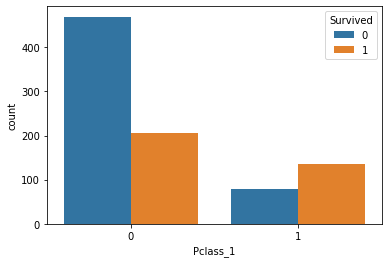

In [35]:
sns.countplot("Pclass_1", hue="Survived", data = df_train)

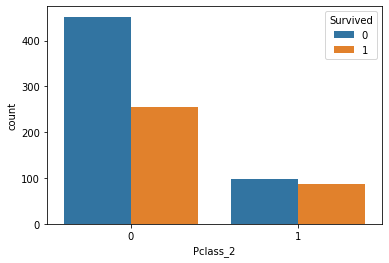

In [36]:
sns.countplot("Pclass_2", hue="Survived", data = df_train)

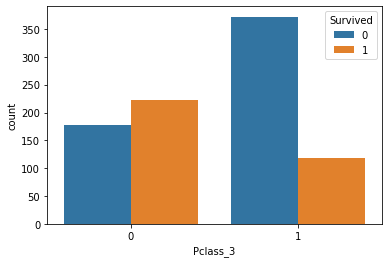

In [37]:
sns.countplot("Pclass_3", hue="Survived", data = df_train)

### Survival Percentages in Passenger Class

In [38]:
df_train[["Pclass_1", "Survived"]].groupby(['Pclass_1'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass_1,Survived
1,1,0.629630
0,0,0.305185


In [39]:
df_train[["Pclass_2", "Survived"]].groupby(['Pclass_2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass_2,Survived
1,1,0.472826
0,0,0.360679


In [40]:
df_train[["Pclass_3", "Survived"]].groupby(['Pclass_3'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass_3,Survived
0,0,0.557500
1,1,0.242363


In [41]:
print('*'*50)
print("Class-1 Survival Rate: 62%")
print("Class-2 Survival Rate: 47%")
print("Class-3 Survival Rate: 24%")
print('*'*50)

**************************************************
Class-1 Survival Rate: 62%
Class-2 Survival Rate: 47%
Class-3 Survival Rate: 24%
**************************************************


**Analysis**: Class-1 Passengers have very high survival percentage while Class-3 Passengers have least survival rate

## Survival Based on If one is travelling alone

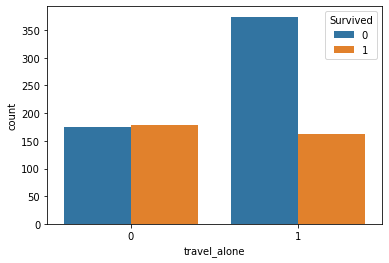

In [42]:
sns.countplot('travel_alone', hue='Survived', data=df_train)

### Survival Percentages in travel_alone

In [43]:
df_train[["travel_alone", "Survived"]].groupby(['travel_alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,travel_alone,Survived
0,0,0.505650
1,1,0.303538


**Analysis:** Those travelling with families have had higher survival rate

## Survival Based on Gender

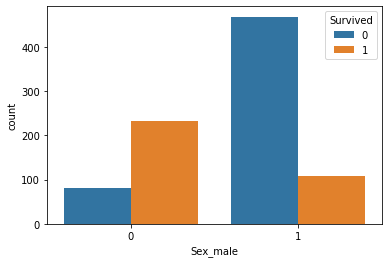

In [44]:
sns.countplot('Sex_male', hue='Survived', data=df_train)

### Survival Percentages in Gender

In [45]:
df_train[["Sex_male", "Survived"]].groupby(['Sex_male'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex_male,Survived
0,0,0.742038
1,1,0.188908


**Analysis:** Females have higher survival rate than Males

## Survival Based on Age

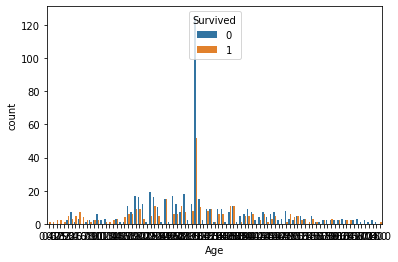

In [46]:
sns.countplot('Age', hue='Survived', data=df_train)

## Survival Based on Fare

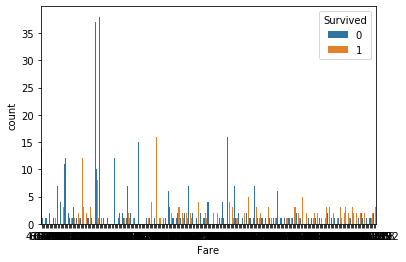

In [47]:
sns.countplot('Fare', hue='Survived', data=df_train)

## Survival Based on Embarkment

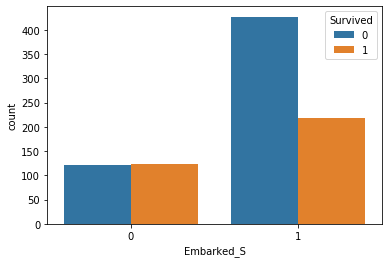

In [48]:
sns.countplot("Embarked_S", hue="Survived", data = df_train)

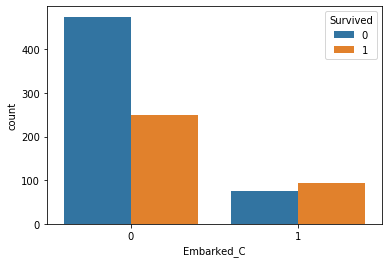

In [49]:
sns.countplot("Embarked_C", hue="Survived", data = df_train)

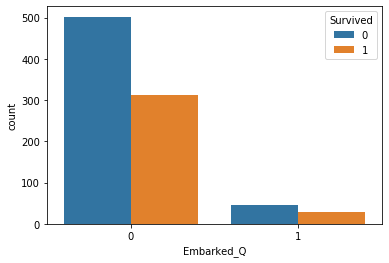

In [50]:
sns.countplot("Embarked_Q", hue="Survived", data = df_train)

## Survival Percentages in Different Boarding Locations

In [51]:
df_train[["Embarked_C", "Survived"]].groupby(['Embarked_C'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked_C,Survived
1,1,0.553571
0,0,0.344398


In [52]:
df_train[["Embarked_S", "Survived"]].groupby(['Embarked_S'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked_S,Survived
0,0,0.502041
1,1,0.339009


In [53]:
df_train[["Embarked_Q", "Survived"]].groupby(['Embarked_Q'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked_Q,Survived
1,1,0.389610
0,0,0.383292


In [54]:
print('*'*50)
print("Port-C Survival Rate: 55%")
print("Port-S Survival Rate: 34%")
print("Port-Q Survival Rate: 39%")
print('*'*50)

**************************************************
Port-C Survival Rate: 55%
Port-S Survival Rate: 34%
Port-Q Survival Rate: 39%
**************************************************


**Analysis:** Port-C has highest survival rate while Port-S has least survival rate

### Adding final categorical variable, for age, as it is important column for analysis

In [55]:
df_train['Minor']=np.where(df_train['Age']<=16, 1, 0)

df_test['Minor']=np.where(df_test['Age']<=16, 1, 0)

# 5: Logistic Regression Model Building

Since we are now familiar with our data, now we can finally perform Logistic Regression
**Main Library Used:** Sklearn

## Initially Checking The Correlation:

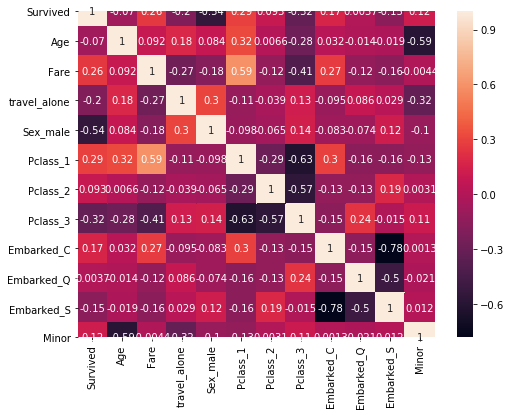

In [56]:
plt.figure(figsize = (8,6))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

## Building the model

Splitting X and Y training data

In [57]:
#using sklearn for Logistic Regression
from sklearn.linear_model import LogisticRegression

#getting RFE for feature selection
from sklearn.feature_selection import RFE

In [58]:
#getting initial variables
vars = ["Age","Fare","travel_alone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","Minor"] 

#splitting into X and Y training datasets
X_train = df_train[vars]
y_train = df_train['Survived']

## Feature Selection Using RFE

In [59]:
#creating logistic regresssion model
md = LogisticRegression()

#using rfe for feature selection
rfe = RFE(md, 8)
rfe = rfe.fit(X_train, y_train)
list(X_train.columns[rfe.support_])

['Age',
 'travel_alone',
 'Pclass_1',
 'Pclass_2',
 'Embarked_C',
 'Embarked_S',
 'Sex_male',
 'Minor']

Finally, we have our variables ready, so we can move forward with model building

In [60]:
#updating training and testing datasets

vars = ['Age', 'travel_alone','Pclass_1','Pclass_2','Embarked_C', 'Embarked_S', 'Sex_male','Minor']
X_train = df_train[vars]
X_test = df_test[vars]
X_train.columns

Index(['Age', 'travel_alone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'Minor'],
      dtype='object')

In [61]:
#fitting final model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 6: Testing the Model

In [62]:
#Testing the data and saving predictions

y_pred = logreg.predict(X_test)

### Getting VIF values

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['vars'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,vars,VIF
0,Age,6.84
5,Embarked_S,6.04
6,Sex_male,3.21
1,travel_alone,2.90
4,Embarked_C,2.38
2,Pclass_1,1.88
3,Pclass_2,1.48
7,Minor,1.43


**Analysis** : VIF values are normal, so we can continue with this model

### Creating Dataframe for Submission

In [65]:
#passenger ids from test data
l1 = passenger_data.tolist()

#creating dataframe
#logreg_submission = pd.DataFrame({"PassengerId": l1, "Survived": y_pred})

#dataframe to csv conversion
#logreg_submission.to_csv('2ndlogreg_submission.csv', index=False)

# 7: Post Submission Analysis:

**Model Score**: 0.7727

The Model Score recieved is actually good, and the best the we could achieve at the moment. Although, we acknowledge that there is scope for improvement.

### Thank you

# Kinshuk Jagdev